In [1]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
 df.isnull().values.any()

False

In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [7]:
import seaborn as sns

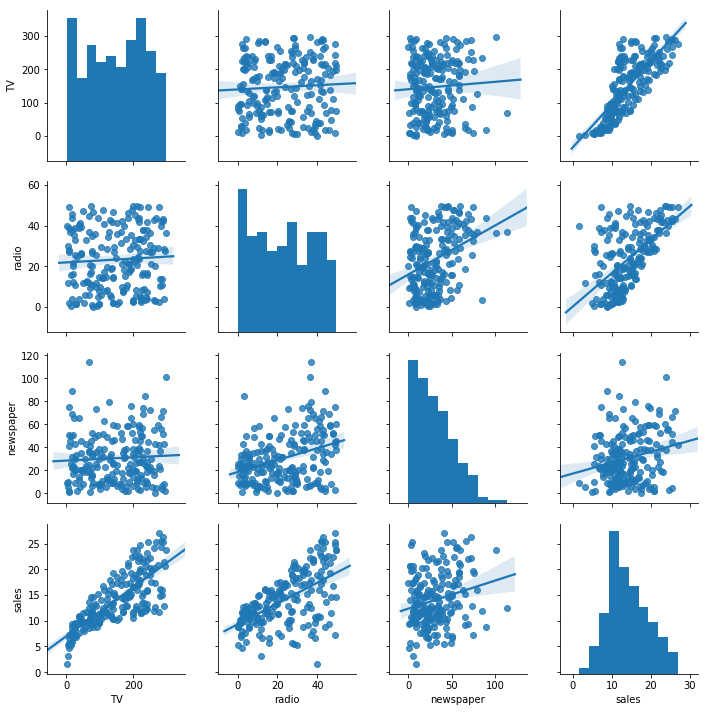

In [9]:
sns.pairplot(df, kind='reg');

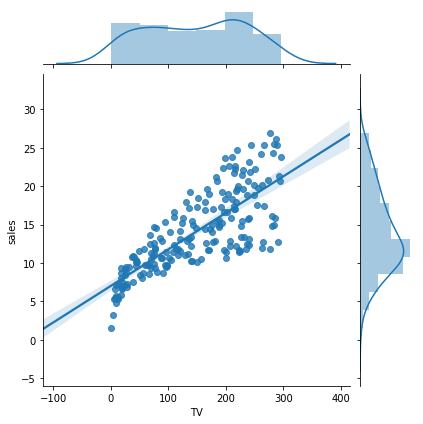

In [14]:
sns.jointplot(x='TV',y='sales',data=df, kind='reg');

In [17]:
# Statsmodel ile modelleme

In [19]:
import statsmodels.api as sm

In [20]:
X=df[['TV']]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [22]:
X=sm.add_constant(X)
X.head()

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [23]:
y=df[['sales']]

In [24]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [26]:
lin_model=sm.OLS(y,X)

In [27]:
model=lin_model.fit()

In [29]:
model.summary()# R kare yorumu: Bağımsız değişkenin bağımlı değişkendeki
               #değişkenliği açıklama başarısıdır
                #düzeltilmiş r kare=> değişken sayısı arttıkça r kare şişer. düzeltilmiş rkare bu 
                #şişkinliğin alınmış halidir
               # Prob(F statistik)= p-value değeri incelendiğinde modelin anlamlı olduğu
               # görülecektir.

# cons ve Tv yazan bölüm yorumu
# sabitimizin ve tv değişkenimizin kat sayılarımız anlamlıdır. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 10 Jul 2019   Prob (F-statistic):           1.47e-42
Time:                        17:55:54   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
import statsmodels.formula.api as smf

In [31]:
lm=smf.ols('sales~TV',df)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 10 Jul 2019   Prob (F-statistic):           1.47e-42
Time:                        18:43:13   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [34]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [35]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [36]:
model.f_pvalue

1.467389700194647e-42

In [37]:
print("f_pvalue: ", "%.4f "%model.f_pvalue)

f_pvalue:  0.0000 


In [38]:
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  312.14


In [39]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  15.36


In [40]:
model.mse_model

3314.618166868649

In [41]:
model.rsquared

0.611875050850071

In [42]:
model.rsquared_adj

0.6099148238341623

In [43]:
model.fittedvalues[0:4]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
dtype: float64

In [44]:
y[0:4]

,sales
0,22.1
1,10.4
2,9.3
3,18.5


In [46]:
print("Sales= "+ str("%.3f"%model.params[0]+"+TV"+'*'+str("%.3f"%model.params[1])))

Sales= 7.033+TV*0.048


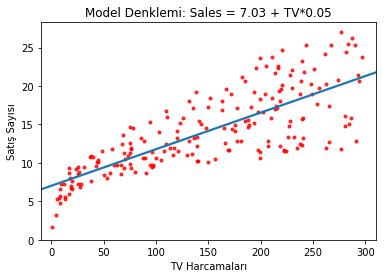

In [47]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [48]:
from sklearn.linear_model import LinearRegression

In [58]:
X=df[['TV']]
y=df[['sales']]
reg=LinearRegression()
model=reg.fit(X,y)
print("sales="+str(model.intercept_)+"Tv*"+str(model.coef_))

sales=[7.03259355]Tv*[[0.04753664]]


In [60]:
model.score(X,y) #Rkare

0.611875050850071

In [61]:
model.predict(X)[0:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [62]:
y[0:10]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


## Tahmin 
### Model denklemi
#### sales=7.03+TV*0.04
#### örneğin 30 birim tv harcaması olduğunda satış tamin değeri ne olur?

In [63]:
sales=7.03+30*0.04
sales

8.23

In [153]:
X=df[['TV']]
y=df['sales']
reg=LinearRegression()
model=reg.fit(X,y)

In [154]:
model.predict([[30]])

array([8.45869276])

In [155]:
df[(df['TV']>29)&(df['TV']<35)]

,TV,radio,newspaper,sales
66,31.5,24.6,2.2,9.5


In [156]:
yeni_veri=[[5],[90],[200]]

In [157]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])

# Artıklar ve Makine öğrenmesindeki Önemi

In [158]:
from sklearn.metrics import mean_squared_error, r2_score

In [159]:
lm=smf.ols('sales~TV',df)
model=lm.fit()

In [160]:
mse=mean_squared_error(y,model.fittedvalues)

In [161]:
mse

10.512652915656757

In [162]:
import numpy as np
rmse=np.sqrt(mse)
rmse

3.2423221486546887

In [163]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [164]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [165]:
k_t=pd.DataFrame({"gercek_y":y[0:10],
                  "tahmin_y":model.predict(X)[0:10]})

In [166]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [167]:
k_t['hata']=k_t['gercek_y']-k_t['tahmin_y']

In [169]:
k_t['hata_kare']=k_t['hata']**2
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [170]:
np.sum(k_t['hata_kare'])

92.90350329638103

In [171]:
np.mean(k_t['hata_kare'])

9.290350329638104

In [172]:
np.sqrt(np.mean(k_t['hata_kare']))

3.0480075999967755

In [173]:
model.resid[0:11]

0     4.129225
1     1.252026
2     1.449776
3     4.265605
4    -2.727218
5    -0.246162
6     2.034050
7     0.453502
8    -2.641409
9    -5.930414
10   -1.574765
dtype: float64

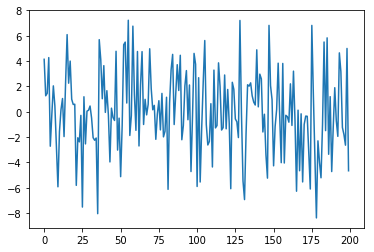

In [175]:
plt.plot(model.resid);